# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd 
import matplotlib.pyplot as plt
import math
from matplotlib import ticker

# we import autoreload modules when code is run, to have the recent changes from the Python file. 
%load_ext autoreload
%autoreload 2

# we import our python file, where we have set up our model.
import inauguralproject
from inauguralproject import *

# we import our class as "model"
from inauguralproject import HouseholdClass 
model = HouseholdClass()


# Question 1

In question 1, we want to solve the model discretely, and illustrate how the relative hours worked at home for men and women $\frac{H_F}{H_M}$ change for different values of $\alpha$ and $\sigma$. 

Based on the provided code, we alter the definition of consumption of home goods H in inauguralproject.py, to allow for $\sigma\neq1$. 

Following this, we solve the model discretely, and find the intial optimal working hours for men and women, in the the market and at home for $\alpha=0.5$ and $\sigma=1$

In [2]:
# we initiate and solve the discrete model. 
initial = model.solve_discrete()

# printing the results
print(f'The initial optimal hours working at home for women is HF = {initial.HF:.1f}' '\n'f'The initial optimal hours working at home for men is HM = {initial.HM:.1f}''\n'f'The initial optimal hours working at the market for women is LF = {initial.LF:.1f}' '\n'f'The initial optimal hours working at the market for men is LM = {initial.LM:.1f}' )


The initial optimal hours working at home for women is HF = 4.5
The initial optimal hours working at home for men is HM = 4.5
The initial optimal hours working at the market for women is LF = 4.5
The initial optimal hours working at the market for men is LM = 4.5


/Users/simoneruthflindhardt/Documents/GitHub/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:80: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


In the discrete model with $\alpha=0.5$, thus equally productive agents in the home production, and $\sigma=1$, the elasticity of substitution, men and women work the same amount of hours at home and in the market. 

In the following, we show how relative optimal working hours at home between men and women change dependent on different values of $\sigma$ and $\alpha$. The results are illustrated in a table, for numerical accuracy and in a 3D plot for a graphical understanding. 

In [3]:
# we unpack the model parameters
par = model.par

# we define vectors with the values of alpha and sigma.
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1,1.5]

# we create a table with the logarithm of the relative hours worked at home for men and women. 
def print_table():
    """ prints table of relative hours worked depending on alpha and sigma"""

    # we define an empty text string
    text = ''
    
    # creating the top header of the table, we loop over the different values of sigma in the vector
    text += f'{"Alpha/Sigma |":3s}'
    for j, sigma in enumerate(sigma_vec): 
       model.par.sigma=sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" # we create a line shift and a line to divide the header from the rest of the table. 
    
    # creating the body of the table. We loop over the different values of alpha in the vector and fill the table with the optimal relative at home working hours defined as "initial"
    for i, alpha in enumerate(alpha_vec): 
        model.par.alpha=alpha
        if i > 0:
            text += '\n' # we create a line shift
        text += f'{alpha:8.2f}    |' # creating the left header with a line to divide it from the rest of the table. 
        for j, sigma in enumerate(sigma_vec):
            model.par.sigma=sigma
            disc = model.solve_discrete()
            text += f'{disc.HF/disc.HM:8.2f}' 
    
    # print
    print(text)

# we print the table: 
print_table();

/Users/simoneruthflindhardt/Documents/GitHub/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:76: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/simoneruthflindhardt/Documents/GitHub/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:76: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Alpha/Sigma |    0.50    1.00    1.50
----------------------------------------
    0.25    |    0.55    0.31    0.21
    0.50    |    1.00    1.00    1.00
    0.75    |    1.83    3.25    4.67


We now want to illustrate the results in a 3D plot

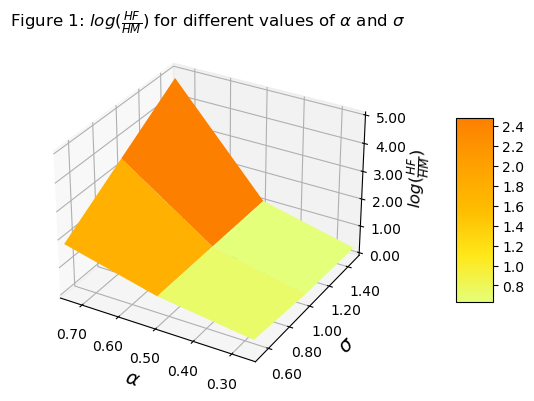

In [4]:
# creating 2D meshgrids of the alpha and sigma vectors
alpha_grid, sigma_grid = np.meshgrid(alpha_vec,sigma_vec)

# creating a matrix of log(HF/HM). We fill our the log_rel_hours matrix with a nested loop through the grids of alpha and sigma. 
log_rel_hours= np.zeros([3,3]) # we create a zero filled matrix the size of the meshgrids of alpha and sigma
for i in range(alpha_grid.shape[1]): # looping through the columns
    for j in range(sigma_grid.shape[0]): # looping through the rows 
        model.par.alpha = alpha_grid[i,j] # defining alpha values as the values from the grid
        model.par.sigma = sigma_grid[i,j] # defining sigma values as the values from the grid 
        disc = model.solve_discrete() 
        log_rel_hours[i,j] = disc.HF/disc.HM

# creating a 3D figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
fig1 = ax.plot_surface(alpha_grid,sigma_grid,log_rel_hours,cmap='Wistia')
ax.set(xlim=(0.25, 0.75), ylim=(0.5,1.5), zlim=(0,5))
ax.set_title("Figure 1: " r"$log(\frac{HF}{HM})$" " for different values of " r"$\alpha$" " and " r"$\sigma$" )
ax.invert_xaxis()

# adding the colourbar 
cbar=fig.colorbar(fig1, shrink=0.5, aspect=5 ,pad = 0.15)
cbar.ax.locator_params(nbins=10)

# adding labels 
ax.set_xlabel(r"$\alpha$", fontsize=14)
ax.set_ylabel(r"$\sigma$", fontsize=14)
ax.set_zlabel(r"$log(\frac{HF}{HM})$", fontsize=12)

# changing the decimals on the axis
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.zaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

For $\alpha=0.5$ men and women are equally productive in the home production, why the relative hours spend on home production are the same regardsless of $\sigma$. The higher $\alpha$, the more productive women are in the home compared to men, thus the more women will work at home relative to men. As the elasticity of substitution $\sigma$ increases, the relative working hours at home differs depending on $\alpha$ being larger or smaller than $0.5$. In the case, $\alpha>0.5$ the relative hours spend working at home increases with $\sigma$. The opposite is true for $\alpha<0.5$.

# Question 2

We now return to $\alpha=0.5$ and $\sigma=1$. 
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$.

In [5]:
# we make sure our alpha and sigma parameters are set back to the original values
par = model.par
model.par.alpha=0.5
model.par.sigma=1

# using the solution vectors defined in the py-file we calculate the logarithm of the relative working hours
model.solve_wF_vec(discrete=True)
log_rel_hours_disc = np.log(model.sol.HF_vec/model.sol.HM_vec)

# we then calculate the relative wages depending on the female wage vector
log_rel_wage=np.log(par.wF_vec/par.wM)

We now want to illustrate this in a scatterplot.

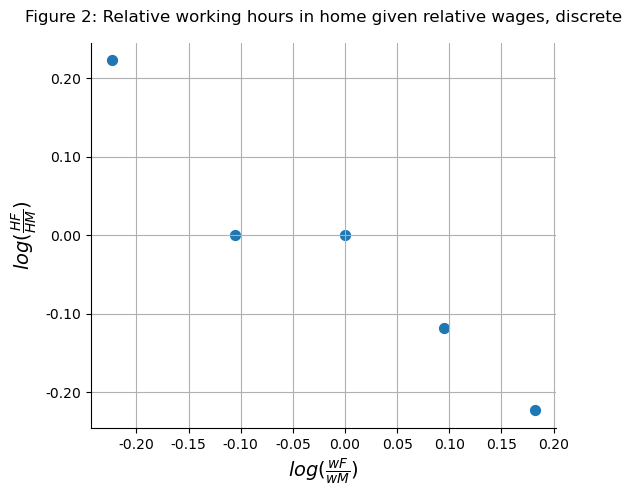

In [6]:
# using this in the plot
x = log_rel_wage
title = ['Figure 2: Relative working hours in home given relative wages, discrete','Figure 3: Relative working hours at home given relative wages, continuous']

# we refer to the figure function in the bottom of the py-file
figure(x,log_rel_hours_disc,title[0])


As expected, the wage for women increases (and thus the relative wage), the amount of hours spend working at home decreases. However, we note that the relationship is not linear for the discrete case.  

# Question 3

Now, the model is continuous.
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$.
We solve the model continuously in inauguralproject.py with $\alpha=0.5$ and $\sigma=1$

In [7]:
# we define the continuous solution
cont = model.solve_continuous()

# we print the results of the continuous model
print(f'The initial optimal hours working at home for women is HF = {cont.HF:.2f}' '\n'f'The initial optimal hours working at home for men is HM = {cont.HM:.2f}''\n'f'The initial optimal hours working at the market for women is LF = {cont.LF:.2f}' '\n'f'The initial optimal hours working at the market for men is LM = {cont.LM:.2f}' )

The initial optimal hours working at home for women is HF = 4.03
The initial optimal hours working at home for men is HM = 4.83
The initial optimal hours working at the market for women is LF = 5.48
The initial optimal hours working at the market for men is LM = 3.09


We solve the continuous model for each value of the female wage $w_F$ and save our solutions for HF, HM, LF, LM in vectors.

In [8]:
# we make sure our alpha and sigma parameters are set back to the original values
par = model.par
model.par.alpha=0.5
model.par.sigma=1

# using the solution vectors defined in the py-file we calculate the logarithm of the relative working hours
model.solve_wF_vec(discrete=False)
log_rel_hours_cont = np.log(model.sol.HF_vec/model.sol.HM_vec)


We create a scatterplot of the results.

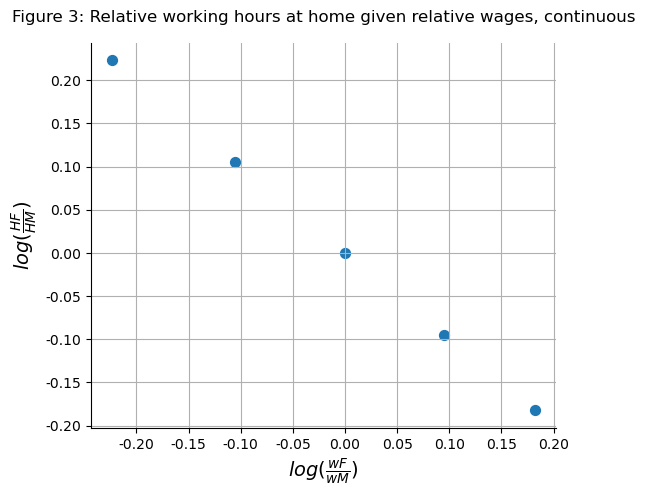

In [9]:
# we refer to the function defined in the py-file in line 318-328 and plot our figure
figure(x,log_rel_hours_cont, title[1])

As in the discrete case, as the wage for women increases (and thus the relative wage), the amount of hours spend working at home decreases. We note that the relationship is now linear. 

# Question 4


Based on the results of the continuous model we run the regression on our data and find $\hat\beta_0$ and $\hat\beta_1$. This is done in inauguralproject.py.

In [10]:
# we run the regression
model.run_regression()

Then we find the values of $\sigma$ and $\alpha$ that minimises the squared error given by $(\beta_0-\hat\beta_0)^2+(\beta_1-\hat\beta_1)^2$, thus mimicking the results found in the article by Siminski and Yetsenga (2022).

In [11]:
# we run the results of the minimization
model.estimate()

# print results
print(f'The values of sigma and alpha that minimize the squared errors are sigma = {model.sol.sigma:.3f} and alpha={model.sol.alpha:.3f}.')
print(f'With these parameters, our model beta_0 = {model.sol.beta0:.3f} and our model beta_1 ={model.sol.beta1:.3f}.')

The values of sigma and alpha that minimize the squared errors are sigma = 0.100 and alpha=0.982.
With these parameters, our model beta_0 = 0.400 and our model beta_1 =-0.100.


An $\alpha=0.982$ implies that females are more productive when working in the home when compared to men. Men and women are equally productive when $\alpha=0.5$.

A $\sigma=0.100$ implies that a low degree of substitution between men and women.

$\beta_1=-0.1$ implies that a 1% change in the relative wages between women and men, will result in a 0,1% change in the relative working hours between men and women. Thus, as women earn relatively more on the labor market their hours spent working a home will fall. However, due a low degree of substitution, an increase in relative wages does not correspond in an equal change in relative working hours at home.

If the relative wages are the same the second term in the regression equation in Siminski and Yetsenga (2022) becomes zero. So if wages are the same for men and women, women will still work more in the home than men, as $log(\frac{H_F}{H_M})=\beta_0=0.4>0$. 

We now want to plot how well the model from Siminski and Yetsenga (2022) fits the data.

In [12]:
# we define the regression from Siminski and Yetsenga
y = par.beta0_target+par.beta1_target*log_rel_wage

# we find and save the vector of optimal relative working hours, when alpha = 0,982 and sigma = 0,1
log_rel_hours_new = np.log(model.sol.HF_vec/model.sol.HM_vec)

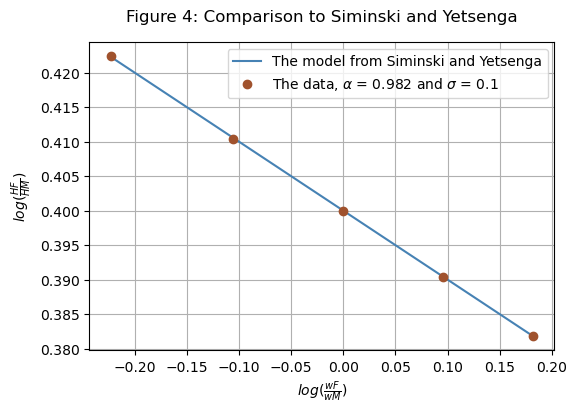

In [13]:
# we create our figure
fig,ax = plt.subplots(figsize=(6,4))
ax.plot(log_rel_wage,y, label="The model from Siminski and Yetsenga", c='steelblue')
ax.plot(log_rel_wage,log_rel_hours_new, '.',markersize=12, c='sienna', label=r"The data, $\alpha$ = 0.982 and $\sigma$ = 0.1")
ax.set(xlabel=r"$log(\frac{wF}{wM})$",ylabel=r"$log(\frac{HF}{HM})$")
ax.legend()
ax.set_title('Figure 4: Comparison to Siminski and Yetsenga',pad=15)
ax.grid();


We find that the model fits our data perfectly, when we have minimized the errors. 

# Question 5

In our extension, we imagine that the policy makers are interested in increasing the hours men work in the home to strenghten gender equality in the labour market, as it has been shown that men spend an hour less on house work per day than women. The underlying idea is that a reform like this might change the social norms and thus the "preferences" of women and men in their choice of labour hours in the home and in the market through a change in wages and cultural structures (as has been done with the new EU legislation of earmarked paternity leave). 

We implement this as a reform, where men are forced to work twice as much in the home than in the market. This is done by changing the relative time spent working in the market and in the home for men, $T_M$.

In [14]:
# we reset the alpha and sigma parameters to reflect the original model
model.par.alpha=0.5
model.par.sigma=1

We solve the extension model for the vector of female wages:

In [15]:
# solving the extended model for varying female wage
model.solve_wF_vec_ext()
log_rel_hours_ext = np.log(model.sol.HF_vec_ext/model.sol.HM_vec_ext)


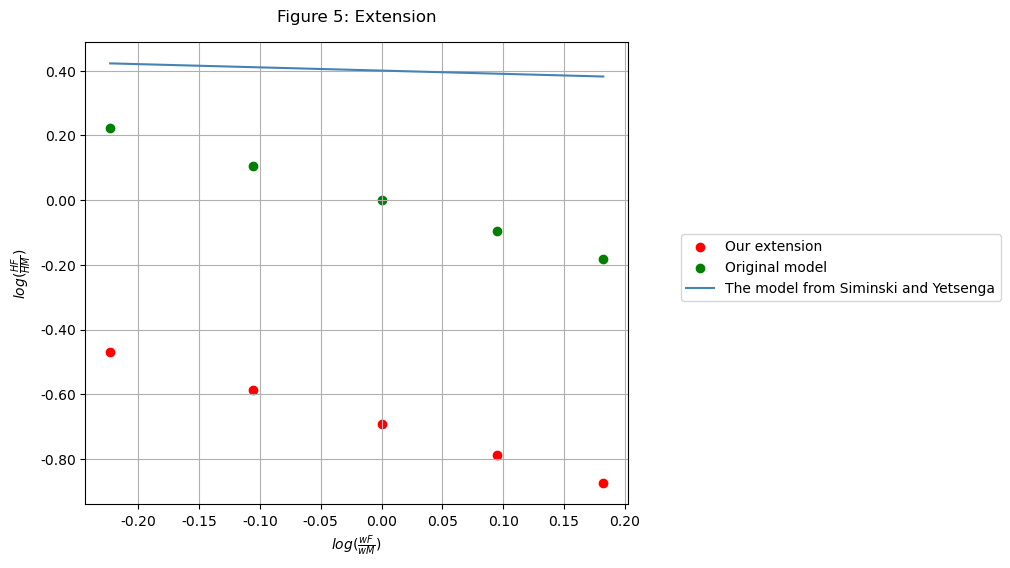

In [16]:
# we create the scatterplot, set labels, title, grid etc. 
fig,ax = plt.subplots(figsize=(7,6))
ax.scatter(x=log_rel_wage,y=log_rel_hours_ext, label="Our extension", c='red')
ax.scatter(x=log_rel_wage,y=log_rel_hours_cont, label="Original model",c='green')
ax.plot(log_rel_wage,y, label="The model from Siminski and Yetsenga", c='steelblue')
ax.set(xlabel=r"$log(\frac{wF}{wM})$",ylabel=r"$log(\frac{HF}{HM})$")
ax.set_title('Figure 5: Extension',pad=15)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.grid()
ax.legend(bbox_to_anchor=(1.7, 0.6));

As we expected, the reform extension did not make the data fit better, as it doesn't reflect reality or current legislation. In Siminski and Yetsenga's data, women work more in the home, possibly reflecting a preference for work in the home for women and a preference for work in the market for men (due to a multitude of reasons, both structural and cultural). This could be modelled by introducing heterogeneity in the $\epsilon$-parameter. However, we think that this so-called preference is a social construction, which does not reflect the actual mindset of modern women. 

## Conclusion

In this project, we have solved the given model both discretely and continuously. We find that the relative working hours spend on home production between women and men vary with the home productivity $\alpha$ and the elasticity of substitution $\sigma$. We furthermore, find that the optimal relative hours worked at home vary with the female wages. 

In question 4 we compare our model to the regression results of Siminski and Yetsenga and optimize our parameters to fit the data they use. We finally extend our model framework with a reform forcing men to spend more hours working at home, which ultimately doesn't fit the data.  
